a.x=-0.6666666666666666
a.x=0.33333333333333337


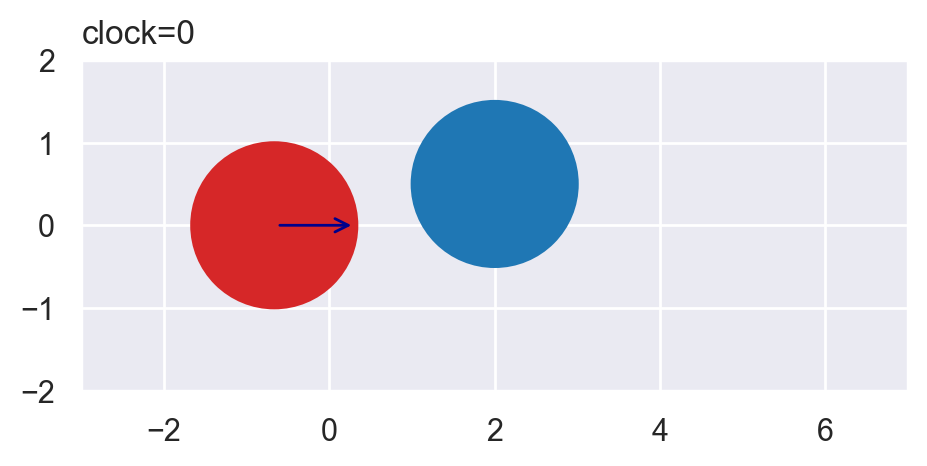

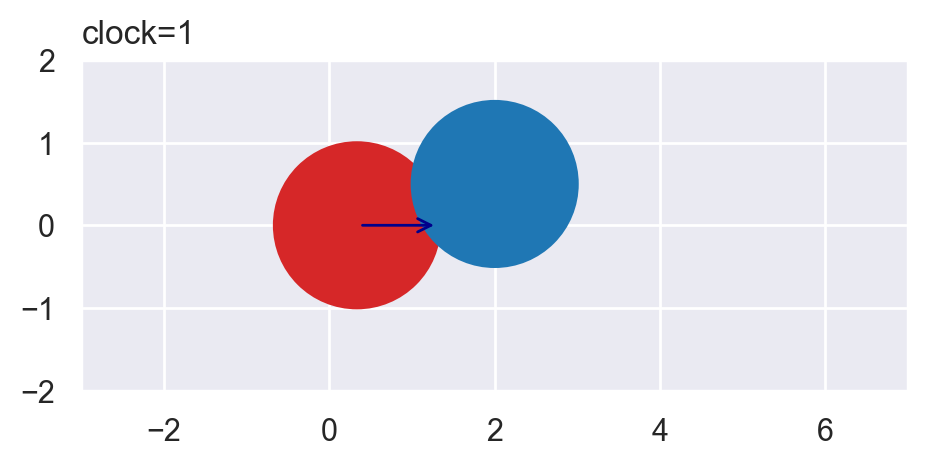

In [ ]:
# Show what happens when you increment time by a fixed amount

from perfect_physics import Circle, World

a = Circle(x=-2/3, y=0, r=1, vx=1, vy=0, m=1)
b = Circle(x=2, y=1/2, r=1, vx=0, vy=0, m=1)
world = World([a, b], [],  xlim=(-3, 7), ylim=(-2, 2))
world.show(colors=["tab:red", "tab:blue"], font_scale=2)
print(f"a.x={float(a.x)}")
world._tick_no_collision(1)
world.show(colors=["tab:red", "tab:blue"], font_scale=2)
print(f"a.x={float(a.x)}")
pass

In [ ]:
import numpy as np
from ipywidgets import interact

from matplotlib import patches
from matplotlib import pyplot as plt

a_x = -2/3; a_y = 0; a_vx = 1; a_vy = 0; a_r = 1
b_x = 2; b_y = 1; b_vx = 1/2; b_vy = -1/2; b_r = 1

def f(t):
    aprime_x = a_x + a_vx * t
    aprime_y = a_y + a_vy * t
    bprime_x = b_x + b_vx * t
    bprime_y = b_y + b_vy * t
    distance = np.sqrt((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2)
    print(f"distance {distance} =?= {a_r + b_r}")

    sns.set()
    figure, axes = plt.subplots()
    axes.set_aspect(1)
    axes.set_xlim(-3.0, 7.0)
    axes.set_ylim(-2.0, 3.0)
    axes.add_patch(patches.Circle((aprime_x, aprime_y), a_r, color="tab:red"))
    axes.add_patch(patches.Circle((bprime_x, bprime_y), a_r, color="tab:blue"))

interact(f, t=(-1, 6, .1), continuous_update=False)

interactive(children=(FloatSlider(value=2.0, description='t', max=6.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.f(t)>

In [ ]:
from sympy import symbols, Eq, nonlinsolve, S, sqrt

t = symbols("t") # define symbols
a_x, a_y, a_vx, a_vy, a_r, aprime_x, aprime_y = symbols(
    "a_x, a_y, a_vx, a_vy, a_r, a'_x, a'_y"
)
b_x, b_y, b_vx, b_vy, b_r, bprime_x, bprime_y = symbols(
    "b_x, b_y, b_vx, b_vy, b_r, b'_x, b'_y"
)

# define equations
eq1 = Eq(aprime_x, a_x + a_vx * t)
eq2 = Eq(aprime_y, a_y + a_vy * t)
eq3 = Eq(bprime_x, b_x + b_vx * t)
eq4 = Eq(bprime_y, b_y + b_vy * t)
eq5 = Eq((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2, (a_r + b_r) ** 2)

cc_all_solutions = nonlinsolve([eq1, eq2, eq3, eq4, eq5], t, aprime_x, aprime_y, bprime_x, bprime_y)
cc_time_solutions = [t for t, aprime_x, ap_y, bp_x, bp_y in cc_all_solutions]
cc_time_solutions[0]

(-a_vx*a_x + a_vx*b_x - a_vy*a_y + a_vy*b_y + a_x*b_vx + a_y*b_vy - b_vx*b_x - b_vy*b_y + sqrt(a_r**2*a_vx**2 - 2*a_r**2*a_vx*b_vx + a_r**2*a_vy**2 - 2*a_r**2*a_vy*b_vy + a_r**2*b_vx**2 + a_r**2*b_vy**2 + 2*a_r*a_vx**2*b_r - 4*a_r*a_vx*b_r*b_vx + 2*a_r*a_vy**2*b_r - 4*a_r*a_vy*b_r*b_vy + 2*a_r*b_r*b_vx**2 + 2*a_r*b_r*b_vy**2 - a_vx**2*a_y**2 + 2*a_vx**2*a_y*b_y + a_vx**2*b_r**2 - a_vx**2*b_y**2 + 2*a_vx*a_vy*a_x*a_y - 2*a_vx*a_vy*a_x*b_y - 2*a_vx*a_vy*a_y*b_x + 2*a_vx*a_vy*b_x*b_y - 2*a_vx*a_x*a_y*b_vy + 2*a_vx*a_x*b_vy*b_y + 2*a_vx*a_y**2*b_vx - 4*a_vx*a_y*b_vx*b_y + 2*a_vx*a_y*b_vy*b_x - 2*a_vx*b_r**2*b_vx + 2*a_vx*b_vx*b_y**2 - 2*a_vx*b_vy*b_x*b_y - a_vy**2*a_x**2 + 2*a_vy**2*a_x*b_x + a_vy**2*b_r**2 - a_vy**2*b_x**2 + 2*a_vy*a_x**2*b_vy - 2*a_vy*a_x*a_y*b_vx + 2*a_vy*a_x*b_vx*b_y - 4*a_vy*a_x*b_vy*b_x + 2*a_vy*a_y*b_vx*b_x - 2*a_vy*b_r**2*b_vy - 2*a_vy*b_vx*b_x*b_y + 2*a_vy*b_vy*b_x**2 - a_x**2*b_vy**2 + 2*a_x*a_y*b_vx*b_vy - 2*a_x*b_vx*b_vy*b_y + 2*a_x*b_vy**2*b_x - a_y**2*b_vx**2

In [ ]:
ts = [
    t.subs(
        {
            a_x: S(-2) / 3,
            a_y: 0,
            a_vx: 1,
            a_vy: 0,
            a_r: 1,
            b_x: 2,
            b_y: 1,
            b_vx: S(1) / 2,
            b_vy: S(-1) / 2,
            b_r: 1,
        }
    )
    for t in cc_time_solutions
]
print(ts)
print([float(t) for t in ts])


[sqrt(47)/3 + 11/3, 11/3 - sqrt(47)/3]
[5.951884866800348, 1.3814484665329854]


In [ ]:
float(sqrt(47)/3 + 11/3), float(11/3 - sqrt(47)/3)

(5.951884866800348, 1.3814484665329851)

In [ ]:
from sympy import symbols, Eq, sqrt
a_x, a_y, a_vx, a_vy, a_r, a_m, ahat_vx, ahat_vy = symbols("a_x, a_y, a_vx, a_vy, a_r, a_m, ahat_vx, ahat_vy")
b_x, b_y, b_vx, b_vy, b_r, b_m, bhat_vx, bhat_vy = symbols("b_x, b_y, b_vx, b_vy, b_r, b_m, bhat_vx, bhat_vy")


# conservation of energy
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2
eq1 = Eq(energy_before, energy_after)

# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx, a_m * ahat_vx + b_m * bhat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy, a_m * ahat_vy + b_m * bhat_vy)

# conservation of glancing velocity
d = sqrt((b_x-a_x)**2 + (b_y-a_y)**2)
ux = -(b_y-a_y)/d
uy = (b_x-a_x)/d
eq4 = Eq((b_vx - a_vx) * ux + (b_vy - a_vy) * uy, (bhat_vx-ahat_vx) * ux + (bhat_vy-ahat_vy) * uy)

In [1]:
from sympy import Rational, sqrt
from perfect_physics import Circle, World
from pathlib import Path

root = Path("M:/projects/perfect_physics")

for seed in range(2):
    left = Circle(x=-3, y=0, r=1, vx=1, vy=0, m=1)
    middle = Circle(x=0, y=0, r=1, vx=0, vy=0, m=1)
    right = Circle(x=4, y=0, r=2, vx=-1, vy=0, m=4)
    world = World([left, middle, right], xlim=(-10, 10), ylim=(-3, 3), rng=seed)
    # world.run_in_place(4,show=True, font_scale=1)
    print(f"seed={seed},vx={[circle.vx for circle in world.circle_list]}")

    folder = root / f"part5/pydata/three_line.{seed}"
    world.run_to_file(folder, 20)
    World.render(folder, fps=120, speed_up=.5, draw_radius=0.9)
pass


seed=0,vx=[1, 0, -1]
seed=1,vx=[1, 0, -1]


  figure.show()



left 1, middle 0, right -1
left 0, middle 1, right -1
left 0, middle -11/5, right -1/5
left -11/5, middle 0, right -1/5
left -11/5, middle -8/25, right -3/25
left -11/5, middle -8/25, right -3/25
left 1, middle 0, right -1
left 1, middle -8/5, right -3/5
left -8/5, middle 1, right -3/5
left -8/5, middle -39/25, right 1/25
left -8/5, middle -39/25, right 1/25
left -8/5, middle -39/25, right 1/25


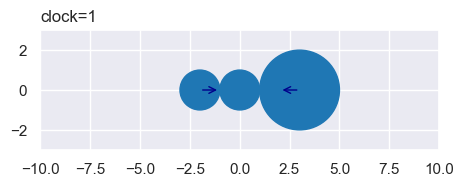

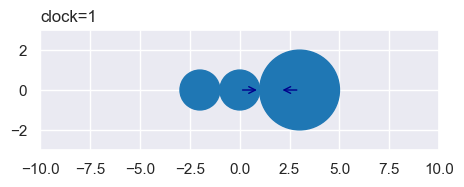

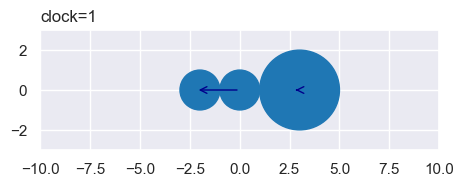

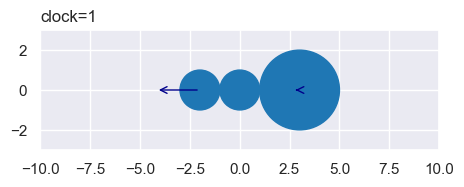

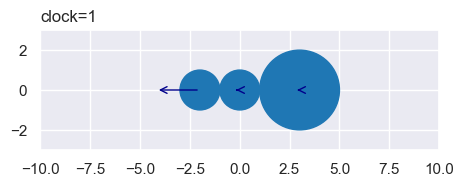

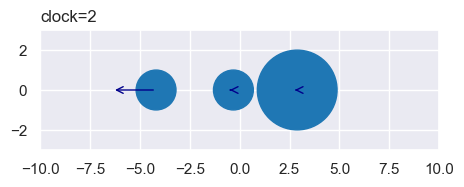

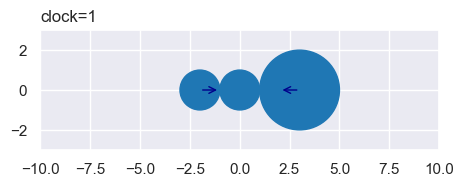

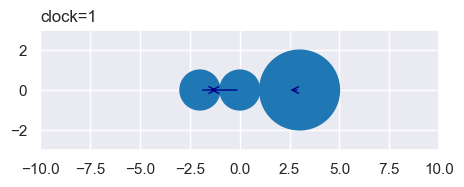

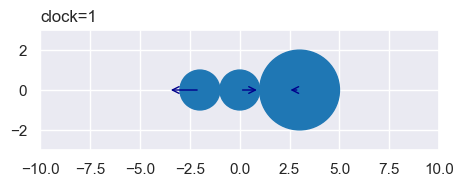

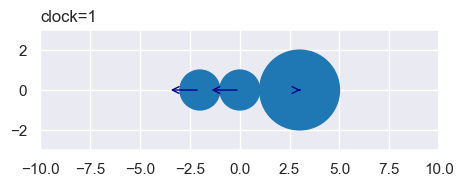

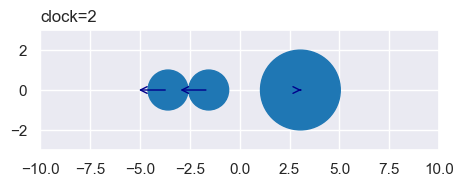

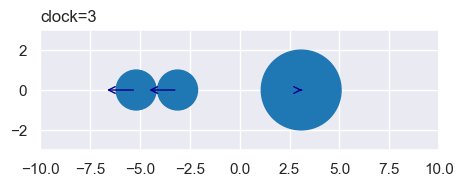

In [1]:
import numpy as np
from perfect_physics import World, Circle, Timeline
from pathlib import Path
import logging

# logging.basicConfig(level=logging.INFO)

root = Path("M:/projects/perfect_physics")
for index in range(0,2):
    left = Circle(x=-3, y=0, r=1, vx=1, vy=0, m=1, id="left")
    middle = Circle(x=0, y=0, r=1, vx=0, vy=0, m=1, id="middle")
    right = Circle(x=4, y=0, r=2, vx=-1, vy=0, m=4, id="right")
    hint_ssca_list = []
    world = World([left, middle, right], xlim=(-10, 10), ylim=(-3, 3), rng=0)
    ss_calist, _ = world._tick(Timeline(), [])
    s0, s1, calist = ss_calist
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock([s0, s1, calist[index:index+1]], [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    # world.show()
    # print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    # world.show()
    # print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")

    pass


In [2]:
from sympy import symbols, Eq, nonlinsolve
a_vx, a_m, ahat_vx =  symbols("a_vx, a_m, ahat_vx")
b_vx, b_m, bhat_vx =  symbols("b_vx, b_m, bhat_vx")
c_vx, c_m, chat_vx =  symbols("c_vx, c_m, chat_vx")

# conservation of energy
energy_before = a_m * a_vx**2 / 2 + b_m * b_vx**2 / 2 + c_m * c_vx**2 / 2
energy_after = a_m * ahat_vx**2 / 2 + b_m * bhat_vx**2 / 2 + c_m * chat_vx**2 / 2
eq1 = Eq(energy_before, energy_after)
# conservation of momentum (x)
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)

three_in_a_row = nonlinsolve([eq1, eq2], [bhat_vx, chat_vx])


In [ ]:
three_in_a_row

{((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx - c_m*((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) - sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_vx + a_m**2*ahat_vx**2 - a_m*a_vx**2*b_m - a_m*a_vx**2*c_m + 2*a_m*a_vx*b_m*b_vx + 2*a_m*a_vx*c_m*c_vx + a_m*ahat_vx**2*b_m + a_m*ahat_vx**2*c_m - 2*a_m*ahat_vx*b_m*b_vx - 2*a_m*ahat_vx*c_m*c_vx - b_m*b_vx**2*c_m + 2*b_m*b_vx*c_m*c_vx - b_m*c_m*c_vx**2))/(c_m*(b_m + c_m))))/b_m, (a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) - sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_vx + a_m**2*ahat_vx**2 - a_m*a_vx**2*b_m - a_m*a_vx**2*c_m + 2*a_m*a_vx*b_m*b_vx + 2*a_m*a_vx*c_m*c_vx + a_m*ahat_vx**2*b_m + a_m*ahat_vx**2*c_m - 2*a_m*ahat_vx*b_m*b_vx - 2*a_m*ahat_vx*c_m*c_vx - b_m*b_vx**2*c_m + 2*b_m*b_vx*c_m*c_vx - b_m*c_m*c_vx**2))/(c_m*(b_m + c_m))), ((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx - c_m*((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) + sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_

4744


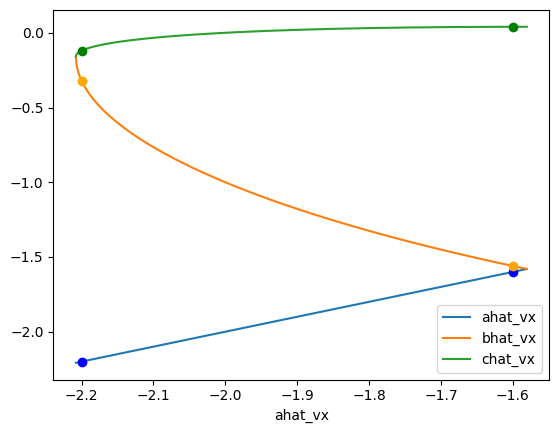

872


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import S

details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
game = [[-11/5,-8/25,-3/25],[-8/5,-39/25, 1/25]]
a = np.linspace(-2.3,1.3,5_000)
for b, c in list(three_in_a_row):
    b = np.array([b.subs(details).subs("ahat_vx", ai) for ai in a])
    c = np.array([c.subs(details).subs("ahat_vx", ai) for ai in a])
    b_mask = [np.isreal(complex(bi)) for bi in b]
    c_mask = [np.isreal(complex(ci)) for ci in c]
    bc_mask = np.logical_and(b_mask, c_mask)
    a = np.array(a[bc_mask])
    b = np.array(b[bc_mask])
    c = np.array(c[bc_mask])
    if True:
        order_mask =np.array([ai <= bi <= ci for ai, bi, ci in zip(a, b, c)], dtype=bool)
        print(len(order_mask))
        a = a[order_mask]
        b = b[order_mask]
        c = c[order_mask]
    if len(a) == 0:
        continue

    plt.plot(a, a, label="ahat_vx")
    plt.plot(a, b, label="bhat_vx")
    plt.plot(a, c, label="chat_vx")
    plt.legend()
    plt.xlabel("ahat_vx")


    for ag, bg, cg in game:
        plt.plot(ag, ag,  marker="o", linestyle='none', c="blue")
        plt.plot(ag, bg,  marker="o", linestyle='none', c="orange")
        plt.plot(ag, cg,  marker="o", linestyle='none', c="green")

    plt.show()
    
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import S

details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
for b, c in list(three_in_a_row):
    b = b.subs(details)
    c = c.subs(details)
    break
b

-ahat_vx/5 - sqrt(-24*ahat_vx**2 - 24*ahat_vx + 64)/5 - 3/5

In [ ]:
import sympy as sp
a = sp.Symbol("a", real=True)

b_as_a = sp.im(b).subs(sp.im(ahat_vx), 0).subs(sp.re(ahat_vx), a)
b_as_a

-sin(atan2(0, -24*a**2 - 24*a + 64)/2)*sqrt(Abs(24*a**2 + 24*a - 64))/5

In [ ]:

b_solve = sp.solve(b_as_a, a)
print(b_solve)
print([float(bi) for bi in b_solve])

[-1/2 + sqrt(105)/6, -sqrt(105)/6 - 1/2]
[1.207825127659933, -2.207825127659933]


In [ ]:
import sympy as sp
c_solve = sp.solve(sp.im(c),ahat_vx)
print(c_solve)
print([float(ci) for ci in c_solve])

[-1/2 + sqrt(105)/6, -sqrt(105)/6 - 1/2]
[1.207825127659933, -2.207825127659933]


In [ ]:
from sympy import symbols, Eq, nonlinsolve
a_vx, a_m, ahat_vx =  symbols("a_vx, a_m, ahat_vx")
b_vx, b_m, bhat_vx =  symbols("b_vx, b_m, bhat_vx")
c_vx, c_m, chat_vx =  symbols("c_vx, c_m, chat_vx")

# conservation of energy
energy_before = a_m * a_vx**2 / 2 + b_m * b_vx**2 / 2 + c_m * c_vx**2 / 2
energy_after = a_m * ahat_vx**2 / 2 + b_m * bhat_vx**2 / 2 + c_m * chat_vx**2 / 2
eq1 = Eq(energy_before, energy_after)
# conservation of momentum (x)
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(ahat_vx, bhat_vx)

a_is_b = nonlinsolve([eq1, eq2, eq3], [ahat_vx, bhat_vx, chat_vx])
a_is_b

{((a_m**2*a_vx + a_m*a_vx*b_m + a_m*b_m*b_vx + a_m*c_m*c_vx + b_m**2*b_vx + b_m*c_m*c_vx - sqrt(c_m*(a_m**2*a_vx**2*b_m + a_m**2*a_vx**2*c_m - 2*a_m**2*a_vx*b_m*b_vx - 2*a_m**2*a_vx*c_m*c_vx + a_m**2*b_m*b_vx**2 + a_m**2*c_m*c_vx**2 + a_m*a_vx**2*b_m**2 + a_m*a_vx**2*b_m*c_m - 2*a_m*a_vx*b_m**2*b_vx - 2*a_m*a_vx*b_m*c_m*c_vx + a_m*b_m**2*b_vx**2 + a_m*b_m*b_vx**2*c_m - 2*a_m*b_m*b_vx*c_m*c_vx + 2*a_m*b_m*c_m*c_vx**2 + b_m**2*b_vx**2*c_m - 2*b_m**2*b_vx*c_m*c_vx + b_m**2*c_m*c_vx**2)))/(a_m**2 + 2*a_m*b_m + a_m*c_m + b_m**2 + b_m*c_m), (a_m**2*a_vx + a_m*a_vx*b_m + a_m*b_m*b_vx + a_m*c_m*c_vx + b_m**2*b_vx + b_m*c_m*c_vx - sqrt(c_m*(a_m**2*a_vx**2*b_m + a_m**2*a_vx**2*c_m - 2*a_m**2*a_vx*b_m*b_vx - 2*a_m**2*a_vx*c_m*c_vx + a_m**2*b_m*b_vx**2 + a_m**2*c_m*c_vx**2 + a_m*a_vx**2*b_m**2 + a_m*a_vx**2*b_m*c_m - 2*a_m*a_vx*b_m**2*b_vx - 2*a_m*a_vx*b_m*c_m*c_vx + a_m*b_m**2*b_vx**2 + a_m*b_m*b_vx**2*c_m - 2*a_m*b_m*b_vx*c_m*c_vx + 2*a_m*b_m*c_m*c_vx**2 + b_m**2*b_vx**2*c_m - 2*b_m**2*b_vx*c_m*

In [ ]:
details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
for a, b, c in list(a_is_b):
    a = a.subs(details)
    b = b.subs(details)
    c = c.subs(details)
    print(f"a={a}, b={b}, c={c}")
    print(f"a={float(a)}, b={float(b)}, c={float(c)}")

a=-1/2 + sqrt(42)/6, b=-1/2 + sqrt(42)/6, c=-sqrt(42)/12 - 1/2
a=0.5801234497346434, b=0.5801234497346434, c=-1.0400617248673216
a=-sqrt(42)/6 - 1/2, b=-sqrt(42)/6 - 1/2, c=-1/2 + sqrt(42)/12
a=-1.5801234497346435, b=-1.5801234497346435, c=0.04006172486732169


In [ ]:
print(sp.latex(a))

- \frac{\sqrt{42}}{6} - \frac{1}{2}


In [ ]:
from sympy import symbols, Eq, nonlinsolve
a_vx, a_m, ahat_vx =  symbols("a_vx, a_m, ahat_vx")
b_vx, b_m, bhat_vx =  symbols("b_vx, b_m, bhat_vx")
c_vx, c_m, chat_vx =  symbols("c_vx, c_m, chat_vx")

# conservation of energy
energy_before = a_m * a_vx**2 / 2 + b_m * b_vx**2 / 2 + c_m * c_vx**2 / 2
energy_after = a_m * ahat_vx**2 / 2 + b_m * bhat_vx**2 / 2 + c_m * chat_vx**2 / 2
eq1 = Eq(energy_before, energy_after)
# conservation of momentum (x)
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(bhat_vx, chat_vx)

b_is_c = nonlinsolve([eq1, eq2, eq3], [ahat_vx, bhat_vx, chat_vx])
b_is_c

{((a_m**2*a_vx + a_m*b_m*b_vx + a_m*c_m*c_vx - sqrt(a_m*(a_m*a_vx**2*b_m**2 + 2*a_m*a_vx**2*b_m*c_m + a_m*a_vx**2*c_m**2 - 2*a_m*a_vx*b_m**2*b_vx - 2*a_m*a_vx*b_m*b_vx*c_m - 2*a_m*a_vx*b_m*c_m*c_vx - 2*a_m*a_vx*c_m**2*c_vx + a_m*b_m**2*b_vx**2 + a_m*b_m*b_vx**2*c_m + a_m*b_m*c_m*c_vx**2 + a_m*c_m**2*c_vx**2 + b_m**2*b_vx**2*c_m - 2*b_m**2*b_vx*c_m*c_vx + b_m**2*c_m*c_vx**2 + b_m*b_vx**2*c_m**2 - 2*b_m*b_vx*c_m**2*c_vx + b_m*c_m**2*c_vx**2)))/(a_m*(a_m + b_m + c_m)), (a_m*a_vx*b_m + a_m*a_vx*c_m + b_m**2*b_vx + b_m*b_vx*c_m + b_m*c_m*c_vx + c_m**2*c_vx + sqrt(a_m*(a_m*a_vx**2*b_m**2 + 2*a_m*a_vx**2*b_m*c_m + a_m*a_vx**2*c_m**2 - 2*a_m*a_vx*b_m**2*b_vx - 2*a_m*a_vx*b_m*b_vx*c_m - 2*a_m*a_vx*b_m*c_m*c_vx - 2*a_m*a_vx*c_m**2*c_vx + a_m*b_m**2*b_vx**2 + a_m*b_m*b_vx**2*c_m + a_m*b_m*c_m*c_vx**2 + a_m*c_m**2*c_vx**2 + b_m**2*b_vx**2*c_m - 2*b_m**2*b_vx*c_m*c_vx + b_m**2*c_m*c_vx**2 + b_m*b_vx**2*c_m**2 - 2*b_m*b_vx*c_m**2*c_vx + b_m*c_m**2*c_vx**2)))/(a_m*b_m + a_m*c_m + b_m**2 + 2*b_m*c_m +

In [ ]:
import sympy as sp

details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
for a, b, c in list(b_is_c):
    a = a.subs(details)
    b = b.subs(details)
    c = c.subs(details)
    print(f"a={a}, b={b}, c={c}")
    print(f"a={float(a)}, b={float(b)}, c={float(c)}")
    break
print(sp.latex(a))

a=-sqrt(105)/6 - 1/2, b=-1/2 + sqrt(105)/30, c=-1/2 + sqrt(105)/30
a=-2.207825127659933, b=-0.15843497446801338, c=-0.15843497446801338
- \frac{\sqrt{105}}{6} - \frac{1}{2}


In [33]:
from sympy import symbols, Eq, nonlinsolve, sin, cos, pi
a_vx, a_vy, a_m, ahat_vx, ahat_vy =  symbols("a_vx, a_vy, a_m, ahat_vx, ahat_vy")
b_vx, b_vy, b_m, bhat_vx, bhat_vy =  symbols("b_vx, b_vy, b_m, bhat_vx, bhat_vy")
c_vx, c_vy, c_m, chat_vx, chat_vy =  symbols("c_vx, c_vy, c_m, chat_vx, chat_vy")

# conservation of energy
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2 + c_m * (c_vx**2 + c_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2 + c_m * (chat_vx**2 + chat_vy**2) / 2
eq1 = Eq(energy_before*2, energy_after*2)
# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy + c_m * c_vy, a_m * ahat_vy + b_m * bhat_vy + c_m * chat_vy)

# always 30 degrees up or down
eq4 = Eq(bhat_vx / cos(pi/6), bhat_vy / sin(pi/6))
eq5 = Eq(chat_vx / cos(-pi/6), chat_vy / sin(-pi/6))

In [34]:
from sympy import S
details = {a_m:1, b_m:1, c_m:1, a_vx:1, b_vx:0, c_vx: 0, a_vy:0, b_vy:0, c_vy:0}
# nope details = {a_m:1, b_m:1, c_m:1, a_vx:S(2)/3, b_vx:-S(1)/3, c_vx: -S(1)/3, a_vy:0, b_vy:0, c_vy:0}
eq1 = eq1.subs(details)
eq2 = eq2.subs(details)
eq3 = eq3.subs(details)
eq4 = eq4.subs(details)
eq5 = eq5.subs(details)
eq1


Eq(1, ahat_vx**2 + ahat_vy**2 + bhat_vx**2 + bhat_vy**2 + chat_vx**2 + chat_vy**2)

In [48]:
eq2

Eq(1, ahat_vx + bhat_vx + chat_vx)

In [41]:
eq3

Eq(0, ahat_vy + bhat_vy + chat_vy)

In [8]:
minipool = nonlinsolve([eq1, eq2, eq3, eq4, eq5], [ahat_vx, bhat_vx, bhat_vy, chat_vx, chat_vy])
len(minipool)

2

max_speed 1.0
all (25, 6)
real (11, 6)
(11, 6)
a to b (10, 6)
a to c (9, 6)
b to c (9, 6)
all (25, 6)
real (11, 6)
(11, 6)
a to b (1, 6)
a to c (0, 6)
b to c (0, 6)
C:\Users\carlk\AppData\Local\Temp\ipykernel_23492\2365657447.py:145: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()



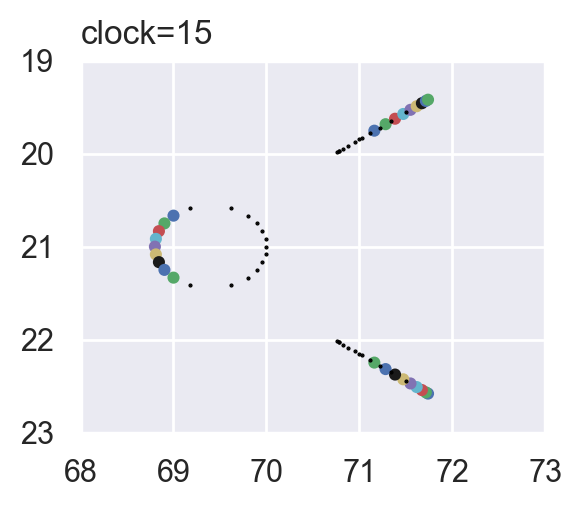

In [62]:
# inc 65 takes 7:30 minutes to 0.3 seconds
import numpy as np
from matplotlib.figure import Figure
from matplotlib import pyplot as plt
from matplotlib import patches
import sympy as sp
from sympy import S, sqrt
import seaborn as sns

inc = 25
color_list = ["b", "g", "r", "c", "m", "y", "k"]
r = (S(2) + S(1)/4) / 2  # 2 ¼ inch diameter balls
ax0, ay0 = 69, 21
bx0, by0 = float(69 + 9*sqrt(3)/8), float(S(177)/8)
cx0, cy0 = float(69 + 9*sqrt(3)/8), float(S(159)/8)
color_index = 0

from perfect_physics import load

point_point_speed_formula = load("instant_speed.sympy")
point_point_speed_formula = sp.lambdify(
    ("a_x", "a_y", "a_vx", "a_vy", "b_x", "b_y", "b_vx", "b_vy"),
    point_point_speed_formula,
    "numpy",
    cse=True,
)


figsize = (19.2 / 4, 10.8 / 4)
font_scale = 2
sns.set()
figure = Figure(figsize=figsize)
axes = figure.add_subplot()
axes.set_aspect(1)
axes.set_xlim(68, 73)
axes.set_ylim(23, 19)

assert details[a_m] == 1 and details[b_m] == 1 and details[c_m] == 1
double_e = (
    float(details[a_vx]) ** 2
    + float(details[a_vy]) ** 2
    + float(details[b_vx]) ** 2
    + float(details[b_vy]) ** 2
    + float(details[c_vx]) ** 2
    + float(details[c_vy]) ** 2
)
max_speed = np.sqrt(double_e)
print("max_speed", max_speed)


lin = np.linspace(-max_speed, max_speed, inc) + 0.0j

all_list = []
abc_list = []
for mini in minipool:
    ay = lin
    ax_fun, bx_fun, by_fun, cx_fun, cy_fun = list(mini)
    ax = sp.lambdify((ahat_vy), ax_fun, "numpy", cse=True)(ay)
    bx = sp.lambdify((ahat_vy), bx_fun, "numpy", cse=True)(ay)
    by = sp.lambdify((ahat_vy), by_fun, "numpy", cse=True)(ay)
    cx = sp.lambdify((ahat_vy), cx_fun, "numpy", cse=True)(ay)
    cy = sp.lambdify((ahat_vy), cy_fun, "numpy", cse=True)(ay)

    abc = np.stack([ax, ay, bx, by, cx, cy], axis=1)
    print("all", abc.shape)

    is_real = np.isreal(abc).all(axis=1)
    abc = abc[is_real]
    print("real", abc.shape)

    abc = abc.real
    print(abc.shape)

    # if by < -cy: # do only half
    #     continue

    all = abc
    # Find the instantaneous, relative speed of each circle toward each other. Circles can't overlap, so the speed must be zero or negative.
    if True:
        a_to_b = (
            point_point_speed_formula(
                ax0, ay0, abc[:, 0], abc[:, 1], bx0, by0, abc[:, 2], abc[:, 3]
            )
            <= 0
        )
        abc = abc[a_to_b]
        print("a to b", abc.shape)

        a_to_c = (
            point_point_speed_formula(
                ax0, ay0, abc[:, 0], abc[:, 1], cx0, cy0, abc[:, 4], abc[:, 5]
            )
            <= 0
        )
        abc = abc[a_to_c]
        print("a to c", abc.shape)

        b_to_c = (
            point_point_speed_formula(
                bx0, by0, abc[:, 2], abc[:, 3], cx0, cy0, abc[:, 4], abc[:, 5]
            )
            <= 0
        )
        abc = abc[b_to_c]
        print("b to c", abc.shape)

    all_list.append(all)
    for ax, ay, bx, by, cx, cy in all:
        ax1, ay1 = ax0 + ax, ay0 + ay
        bx1, by1 = bx0 + bx, by0 + by
        cx1, cy1 = cx0 + cx, cy0 + cy
        axes.scatter([ax1, bx1, cx1], [ay1, by1, cy1], c="black", s=.25)

    abc_list.append(abc)
    for ax, ay, bx, by, cx, cy in abc:
        # print(f"ax={ax:.4f}, ay={ay:.4f}, a_tan={a_tan:.2f}, bx={bx:.4f}, by={by:.4f}, b_tan={b_tan:.2f}, cx={cx:.4f}, cy={cy:.4f}, c_tan={c_tan:.2f}, color={color_list[color_index]}")

        ax1, ay1 = ax0 + ax, ay0 + ay
        bx1, by1 = bx0 + bx, by0 + by
        cx1, cy1 = cx0 + cx, cy0 + cy

        if False:
            axes.plot([ax1, bx1], [ay1, by1], c=color_list[color_index])
            axes.plot([ax1, cx1], [ay1, cy1], c=color_list[color_index])
            axes.plot([bx1, cx1], [by1, cy1], c=color_list[color_index])
        # axes.scatter([ax1, bx1, cx1], [ay1, by1, cy1], c= color_list[color_index], s=40)
        for dx1, dy1 in [(ax1, ay1), (bx1, by1), (cx1, cy1)]:
            axes.add_patch(patches.Circle((dx1, dy1), .05, color=color_list[color_index]))

        # plt.text(ax1, ay1, "a", fontsize=12, color=color_list[color_index], ha='right', va='bottom')
        # plt.text(bx1, by1, "b", fontsize=12, color=color_list[color_index], ha='right', va='bottom')
        # plt.text(cx1, cy1, "c", fontsize=12, color=color_list[color_index], ha='right', va='bottom')

        color_index = (color_index + 1) % len(color_list)
# axes.fill([ax0, bx0, cx0, ax0], [ay0, by0, cy0, ay0], color="k", alpha=0.4)

axes.set_title("clock=15", loc="left")
figure.set_dpi(100 * font_scale)
figure.tight_layout()
new_manager = plt.figure().canvas.manager
new_manager.canvas.figure = figure
figure.set_canvas(new_manager.canvas)
figure.set_dpi(100 * font_scale)
figure.tight_layout()
figure.show()
pass


In [76]:
import logging
from perfect_physics import Wall, World
from pathlib import Path
root = Path("m:/projects/perfect_physics")

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

draw_radius = .95

rows = -2
for seed in [0, 2]:
    folder = root / f"part5/pydata/billiards.{rows}.{seed}"
    world = World.billiards(rows=rows, rng=seed)
    world.circle_list[0].x = 55
    world.wall_list = [Wall(50, 0, 50, 1), Wall(80, 0, 80, 1), Wall(0, 30, 1, 30), Wall(0, 10, 1, 10)]
    world.xlim = (49,81)
    world.ylim = (9,31)
    if False:
        world.show(draw_radius=draw_radius)
    else:
        world.run_to_file(folder, 5)
        World.render_events(folder, draw_radius=draw_radius)
        World.render(folder, speed_up=4, draw_radius=draw_radius)

Multiple collisions: 2
Moviepy - Building video m:\projects\perfect_physics\part5\pydata\billiards.-2.2\render_events\billiards.-2.2.events.avi.
MoviePy - Writing audio in billiards.-2.2.eventsTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video m:\projects\perfect_physics\part5\pydata\billiards.-2.2\render_events\billiards.-2.2.events.avi



Moviepy - Done !
Moviepy - video ready m:\projects\perfect_physics\part5\pydata\billiards.-2.2\render_events\billiards.-2.2.events.avi
Moviepy - Building video m:\projects\perfect_physics\part5\pydata\billiards.-2.2\render\billiards.-2.2.avi.
MoviePy - Writing audio in billiards.-2.2TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video m:\projects\perfect_physics\part5\pydata\billiards.-2.2\render\billiards.-2.2.avi



t:  93%|█████████▎| 139/149 [00:01<00:00, 112.45it/s, now=None]

o:\programs\perfect-physics\.conda\lib\site-packages\moviepy\video\io\ffmpeg_reader.py:123: UserWarning: Warning: in file m:\projects\perfect_physics\part5\pydata\billiards.-2.2\render\misc\silent_video.avi, 6220800 bytes wanted but 0 bytes read,at frame 148/149, at time 6.17/6.17 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready m:\projects\perfect_physics\part5\pydata\billiards.-2.2\render\billiards.-2.2.avi


Multiple collisions: 2
atan=240.00
atan=30.00
atan=330.00
Multiple collisions: 2
atan=120.00
atan=30.00
atan=330.00
6


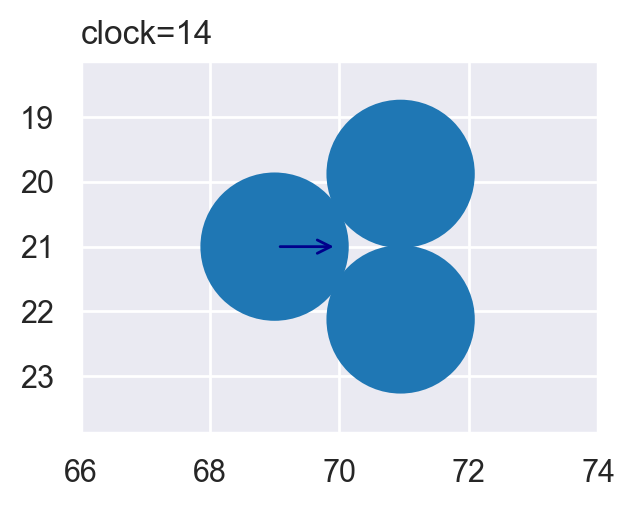

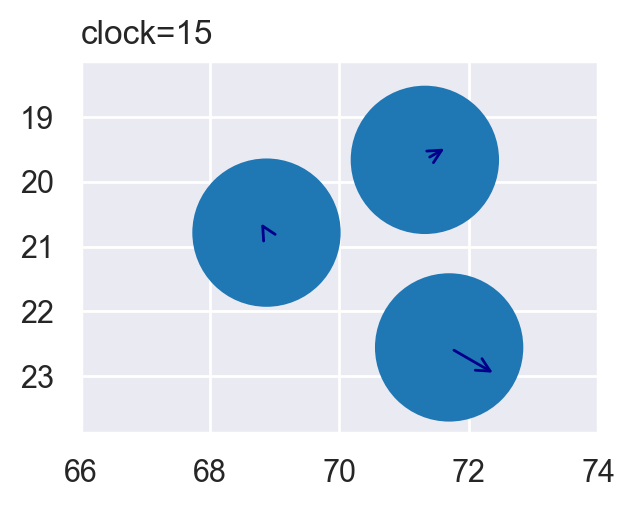

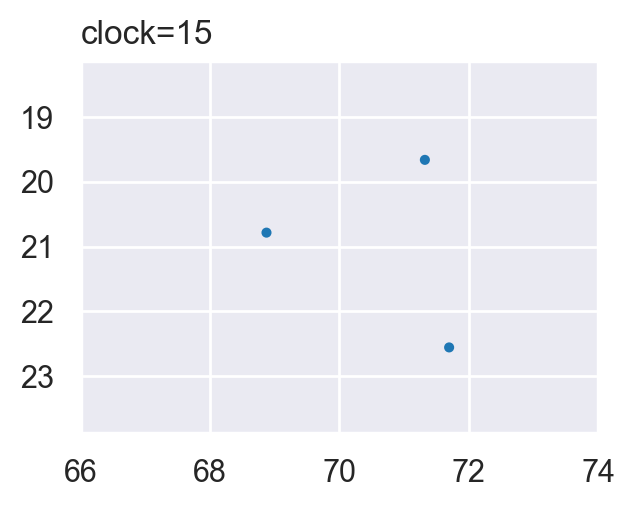

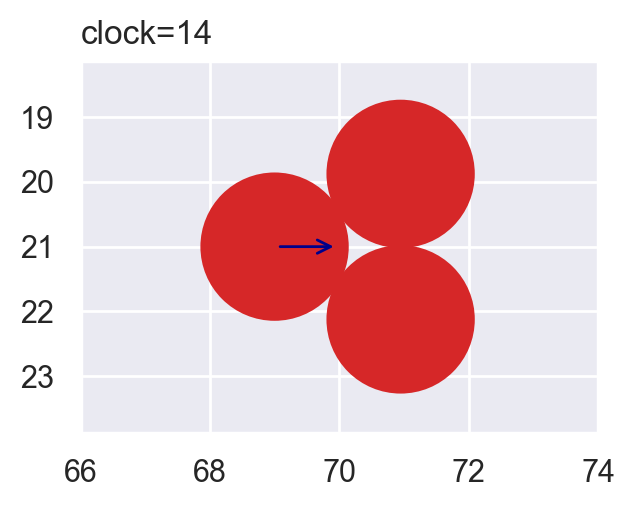

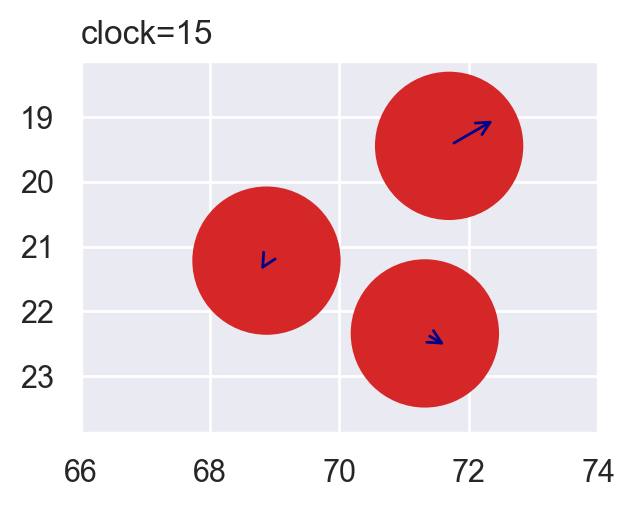

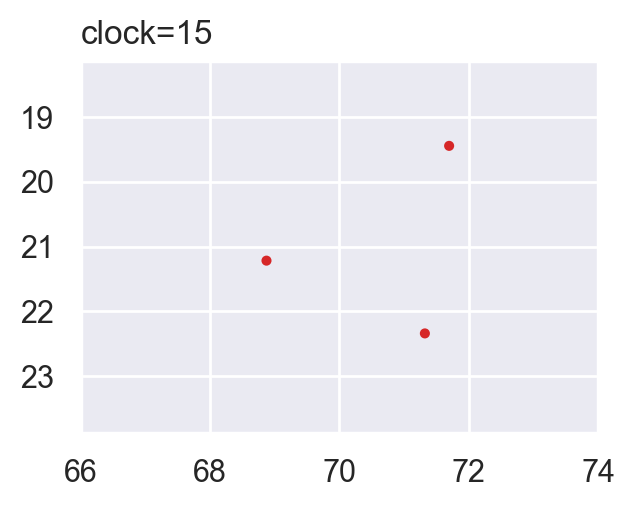

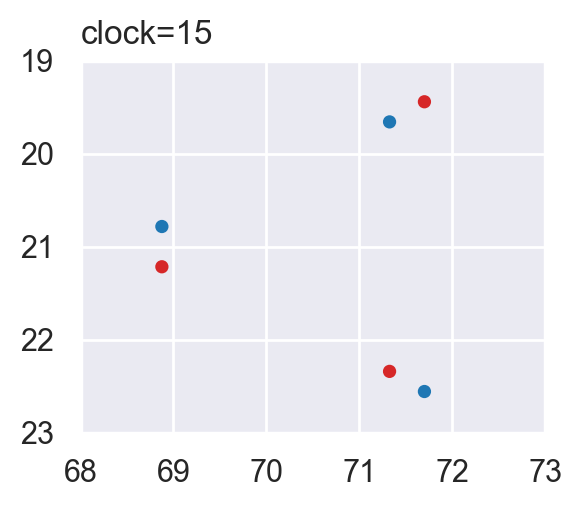

In [53]:
import logging
import numpy as np
from perfect_physics import Wall, World, Timeline
from pathlib import Path
root = Path("m:/projects/perfect_physics")

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

draw_radius = 1
little_radius = 0.05
rows = -2
font_scale = 2

figures = []
list_of_circles = []
for seed in [0, 1]:
    colors = ["tab:blue"] if seed == 0 else ["tab:red"]
    folder = root / f"part5/pydata/billiards.zoom.{rows}.{seed}"
    world = World.billiards(rows=rows, rng=seed)
    world.circle_list[0].x = 55
    world.wall_list = [Wall(50, 0, 50, 1), Wall(80, 0, 80, 1), Wall(0, 30, 1, 30), Wall(0, 10, 1, 10)]
    _, _ = world._tick(Timeline(),[])
    world._tick_no_collision(-1)
    world.xlim = (world.circle_list[0].x-2, 74)
    world.ylim = (world.circle_list[2].y+4, world.circle_list[1].y-4)
    if True:
        world._tick_no_collision(1)
        world.show(draw_radius=draw_radius, colors=colors, font_scale=font_scale)
        world.tick_tock(Timeline(), [], 1)
        world._tick_no_collision(1)
        world.show(draw_radius=draw_radius, colors=colors, font_scale=font_scale)
        list_of_circles = list_of_circles + world.circle_list.copy()
        for circle in world.circle_list:
            atan = np.arctan2(float(circle.vy), float(circle.vx)) * 180 / np.pi % 360
            print(f"atan={atan:.2f}")
            circle.vx, circle.vy = 0, 0
        figure = world.show(draw_radius=little_radius, colors=colors, font_scale=font_scale)
        figures.append(figure)
    else:
        world.run_to_file(folder, 4)
        # World.render_events(folder, draw_radius=draw_radius)
        World.render(folder, speed_up=4, draw_radius=draw_radius)
world.circle_list = list_of_circles
world.xlim = (68,73)
world.ylim = (23,19)
world.show(draw_radius=little_radius, 
           colors=["tab:blue", "tab:blue", "tab:blue", "tab:red", "tab:red", "tab:red"],
           font_scale=font_scale)
print(len(list_of_circles))
pass

2
(1, 0, 0, 0, 0, 0)
(-1/5, 0, 3/5, sqrt(3)/5, 3/5, -sqrt(3)/5)
9
o:\programs\perfect-physics\perfect_physics\_misc.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()



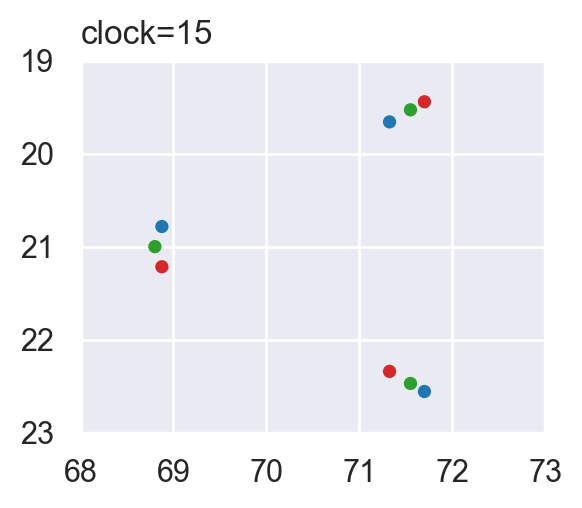

In [58]:
# find the symmetric solution

eq6 = Eq(bhat_vx, chat_vx)
eq7 = Eq(bhat_vy, -chat_vy)

sym_solve = nonlinsolve([eq1, eq2, eq3, eq4, eq5, eq6, eq7],
                        [ahat_vx, ahat_vy, bhat_vx, bhat_vy, chat_vx, chat_vy])
print(len(sym_solve))
print(list(sym_solve)[0])
print(list(sym_solve)[1])
sym_solve = [float(v) for v in list(sym_solve)[1]]

# import deepcopy
from copy import deepcopy

world.circle_list = list_of_circles  + deepcopy(list_of_circles[:3])
print(len(world.circle_list))
world.circle_list[-3].x = sym_solve[0] + ax0
world.circle_list[-3].y = sym_solve[1] + ay0
world.circle_list[-2].x = sym_solve[2] + bx0
world.circle_list[-2].y = sym_solve[3] + by0
world.circle_list[-1].x = sym_solve[4] + cx0
world.circle_list[-1].y = sym_solve[5] + cy0
# world.xlim = (68,73)
# world.ylim = (23,19)
world.show(draw_radius=little_radius, 
           colors=["tab:blue", "tab:blue", "tab:blue", "tab:red", "tab:red", "tab:red",
                   "tab:green", "tab:green", "tab:green"],
           font_scale=font_scale)
pass


C:\Users\carlk\AppData\Local\Temp\ipykernel_23492\1205300566.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()



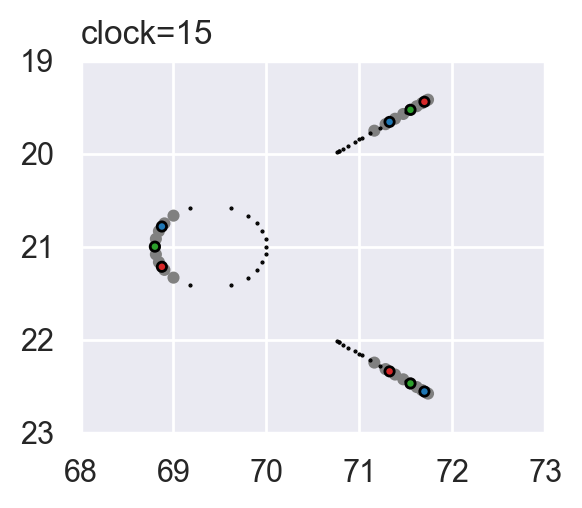

In [72]:
figure = Figure(figsize=figsize)
axes = figure.add_subplot()
axes.set_aspect(1)
axes.set_xlim(68, 73)
axes.set_ylim(23, 19)

for all, abc in zip(all_list, abc_list):
    for ax, ay, bx, by, cx, cy in all:
        ax1, ay1 = ax0 + ax, ay0 + ay
        bx1, by1 = bx0 + bx, by0 + by
        cx1, cy1 = cx0 + cx, cy0 + cy
        axes.scatter([ax1, bx1, cx1], [ay1, by1, cy1], c="black", s=.25)

    for ax, ay, bx, by, cx, cy in abc:
        # print(f"ax={ax:.4f}, ay={ay:.4f}, a_tan={a_tan:.2f}, bx={bx:.4f}, by={by:.4f}, b_tan={b_tan:.2f}, cx={cx:.4f}, cy={cy:.4f}, c_tan={c_tan:.2f}, color={color_list[color_index]}")

        ax1, ay1 = ax0 + ax, ay0 + ay
        bx1, by1 = bx0 + bx, by0 + by
        cx1, cy1 = cx0 + cx, cy0 + cy

        if False:
            axes.plot([ax1, bx1], [ay1, by1], c=color_list[color_index])
            axes.plot([ax1, cx1], [ay1, cy1], c=color_list[color_index])
            axes.plot([bx1, cx1], [by1, cy1], c=color_list[color_index])
        # axes.scatter([ax1, bx1, cx1], [ay1, by1, cy1], c= color_list[color_index], s=40)
        for dx1, dy1 in [(ax1, ay1), (bx1, by1), (cx1, cy1)]:
            axes.add_patch(patches.Circle((dx1, dy1), .05, color="gray"))

        # plt.text(ax1, ay1, "a", fontsize=12, color=color_list[color_index], ha='right', va='bottom')
        # plt.text(bx1, by1, "b", fontsize=12, color=color_list[color_index], ha='right', va='bottom')
        # plt.text(cx1, cy1, "c", fontsize=12, color=color_list[color_index], ha='right', va='bottom')

        color_index = (color_index + 1) % len(color_list)
# axes.fill([ax0, bx0, cx0, ax0], [ay0, by0, cy0, ay0], color="k", alpha=0.4)

colors=["tab:blue", "tab:blue", "tab:blue", "tab:red", "tab:red", "tab:red",
                   "tab:green", "tab:green", "tab:green"]
for circle, color in zip(world.circle_list, colors):
    dx1, dy1 = circle.x, circle.y
    axes.add_patch(patches.Circle((dx1, dy1), .05, facecolor=color, edgecolor='black'))
axes.set_title("clock=15", loc="left")
figure.set_dpi(100 * font_scale)
figure.tight_layout()
new_manager = plt.figure().canvas.manager
new_manager.canvas.figure = figure
figure.set_canvas(new_manager.canvas)
figure.set_dpi(100 * font_scale)
figure.tight_layout()
figure.show()
pass


In [17]:
list(minipool)[0].subs(chat_vy,-S(49)/100)

(1/3 - sqrt(2797)/150, 0, sqrt(2797)/300 + 1/3, 49/100, sqrt(2797)/300 + 1/3, -49/100)

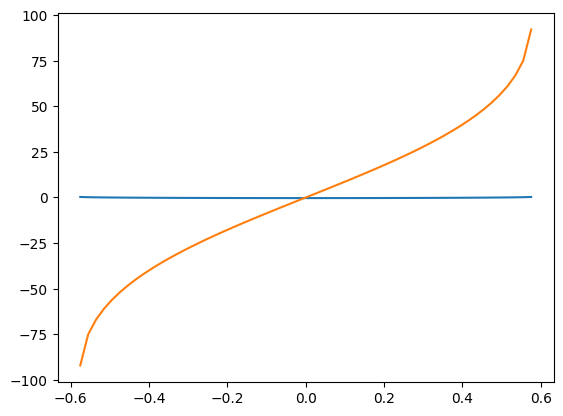

In [30]:
import numpy as np
import matplotlib.pyplot as plt

cy = np.linspace(-1,1,100)
ax = []
c_tan = []
for cyi in cy:
    axi,ayi,bxi,byi,cxi,_ = list(minipool)[0].subs(chat_vy,cyi)
    axi, cxi = complex(axi), complex(cxi)
    axi, cxi = (axi.real, cxi.real) if axi.imag == 0 else (np.nan, np.nan)
    ax.append(axi)
    c_tani = np.tan(np.arctan2(cyi, cxi))  * 180 / np.pi
    c_tan.append(c_tani)
plt.plot(cy, ax)
plt.plot(cy, c_tan)
plt.show()